## Pandas

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')

In [ ]:
#Basic statistical description about the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [ ]:
# Checking if the data has null values
#df.isnull()
df.isnull().sum()


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [ ]:
#Replacing the null values with the mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [ ]:
# selected duration and calories column and aggregated the data using: min, max, count, mean
df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])

,Duration,Calories
min,15.000000,50.300000
max,300.000000,1860.400000
count,169.000000,169.000000
mean,63.846154,375.790244


In [ ]:
# 5 Filtering the dataframe to select the rows with calories values between 500 and 1000.
caloriey_filter = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
caloriey_filter

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [ ]:
# 6 Filtering the dataframe to select the rows with calories values > 500 and pulse < 100
calory_pulse_filter = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
calory_pulse_filter


,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [ ]:
#7 Creating a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
# we set the axix 1 to represent the column
df_modified = df.drop('Maxpulse', axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [ ]:
# 8 Deleting the “Maxpulse” column from the main df dataframe
df.drop('Maxpulse', axis=1, inplace=True)
print(df.head())

   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0


In [ ]:
# 9 Converting the datatype of Calories column to int datatype
df['Calories'] = df['Calories'].astype(int)
print(df.dtypes)
df.head()

Duration    int64
Pulse       int64
Calories    int64
dtype: object


,Duration,Pulse,Calories
0,60,110,409
1,60,117,479
2,60,103,340
3,45,109,282
4,45,117,406


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


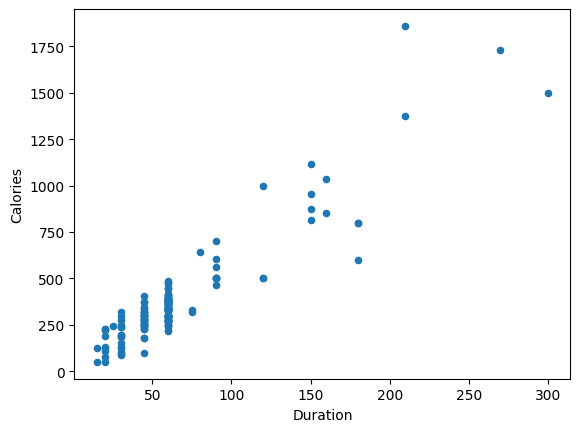

In [ ]:
# 10 Using pandas creating a scatter plot for the two columns (Duration and Calories)
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Duration', y='Calories')
plt.show()

## Glass Dataset

In [ ]:
glass=pd.read_csv("glass.csv") #importing glass dataset from given link

In [ ]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
des=glass.corr()
glass.corr().style.background_gradient(cmap="Blues")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


b. Use train_test_split to create training and testing part.

In [ ]:
features = ['Rl', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = 'Type'


X_train, X_val, Y_train, Y_val = train_test_split(glass[::-1], glass[target],test_size=0.2, random_state=1)

In [ ]:
#Evaluate the model on testing part using score and classification_report(y_true, y_pred)
classifier = GaussianNB()

classifier.fit(X_train, Y_train)


y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        19
           2       0.92      0.92      0.92        12
           3       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.84        43
   macro avg       0.76      0.69      0.71        43
weighted avg       0.89      0.84      0.85        43

[[18  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 1  0  3  2  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  1  0  3]]

accuracy is 0.8372093023255814


1. Implement linear SVM method using scikit library

In [ ]:
from sklearn.svm import SVC, LinearSVC
classifier = LinearSVC()

classifier.fit(X_train, Y_train)

LinearSVC()

In [ ]:
# Evaluate the model on testing part using score and classification_report(y_true, y_pred)
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('\naccuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.48      0.92      0.63        12
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.67        43
   macro avg       0.25      0.31      0.27        43
weighted avg       0.58      0.67      0.61        43

[[18  1  0  0  0  0]
 [ 0 11  0  0  1  0]
 [ 0  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  3  0  0  1  0]]

accuracy is 0.6744186046511628


<Axes: >

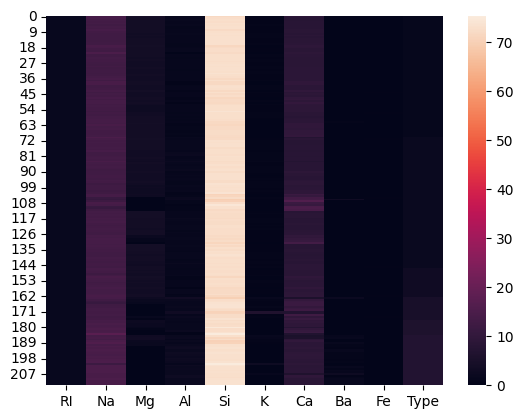

In [ ]:
sns.heatmap(data=glass) #HeatMap Visualization for above dataset


<Axes: >

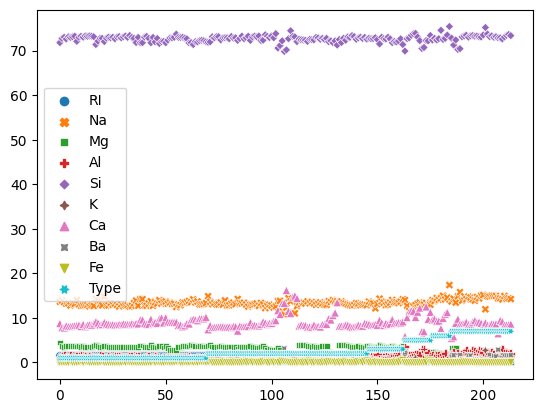

In [ ]:
sns.scatterplot(data=glass)  #ScatterPlot Visualization for above dataset

Naive Bayes method is best for data visualization than that of Support Vector Machine method when we compare the accuracy.
As accuracy is higher for naive bayes than SVM